In [1]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
fp2 = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\nuevas2"
allfiles = os.listdir(fp2)

In [9]:
slices = []
for file in allfiles:

    img = nib.load(os.path.join(fp2,file))
    test = img.get_fdata()
    slices.append(np.size(test,2))
print(slices)

[47, 39, 20, 15, 20, 20, 29, 23, 23, 23, 23, 23, 45, 23, 23, 23, 28, 23, 26, 28, 46, 32, 30, 32, 32, 32, 36, 32, 54, 32, 32, 32, 38, 32, 32, 32, 32, 32, 32, 42, 23, 32, 32, 32, 32, 32, 32, 35, 34, 34, 46, 32, 32, 32, 24, 24, 24, 24, 24, 24, 24, 42, 24, 24, 24, 24, 24, 64, 64, 64, 64, 64, 39, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 34, 64, 64, 64, 64, 15, 20, 24, 20, 20, 20, 40, 20, 15, 17, 20, 20, 20, 15, 20, 20, 20, 47, 20, 20, 18, 20, 20, 20, 20, 20, 19, 20, 47, 39, 20, 15, 20, 20, 29, 23, 23, 23, 23, 23, 45, 23, 23, 23, 28, 23, 26, 28, 46, 32, 30, 32, 32, 32, 36, 32, 54, 32, 32, 32, 38, 32, 32, 32, 32, 32, 32, 42, 23, 32, 32, 32, 32, 32, 32, 35, 34, 34, 46, 32, 32, 32, 24, 24, 24, 24, 24, 24, 24, 42, 24, 24, 24, 24, 24, 64, 64, 64, 64, 64, 39, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 34, 64, 64, 64, 64, 15, 20, 24, 20, 20, 20, 40, 20, 15, 17, 20, 20, 20, 15, 20, 20, 20, 47, 20, 20, 18, 20, 20, 20, 20, 20, 19, 20]


In [46]:
from collections import Counter
c = Counter(slices)
print(c)

Counter({32: 46, 20: 44, 64: 38, 24: 26, 23: 20, 15: 8, 34: 6, 47: 4, 39: 4, 28: 4, 46: 4, 42: 4, 29: 2, 45: 2, 26: 2, 30: 2, 36: 2, 54: 2, 38: 2, 35: 2, 40: 2, 17: 2, 18: 2, 19: 2})


(array([14., 90.,  8., 54., 10.,  6., 10.,  2.,  0., 38.]),
 array([15. , 19.9, 24.8, 29.7, 34.6, 39.5, 44.4, 49.3, 54.2, 59.1, 64. ]),
 <BarContainer object of 10 artists>)

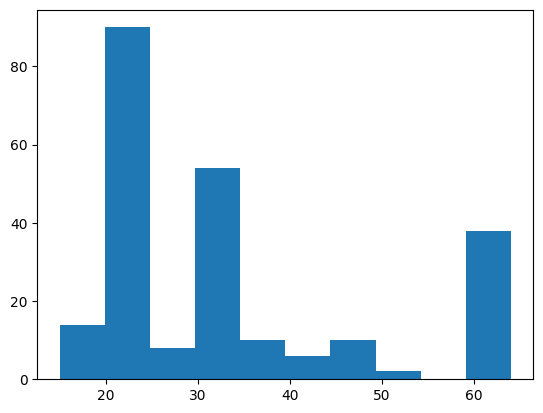

In [47]:
plt.hist(slices,bins=10)

In [10]:
fp2 = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\flipped"
fp = r"C:\Users\Pier\Desktop\PFI_main\ds_mezcla_segmentacion integra\finales2"
x = nib.load(os.path.join(fp2,"sujeto_101"+".nii"))
sujeto = x.get_fdata()
print(x.header["pixdim"][3])

4.0000005


116 pacientes (sujeto_x, segmentacion_x)
Imágenes de 384x384 rotadas 90° sentido anti-horario #corregido con otro script

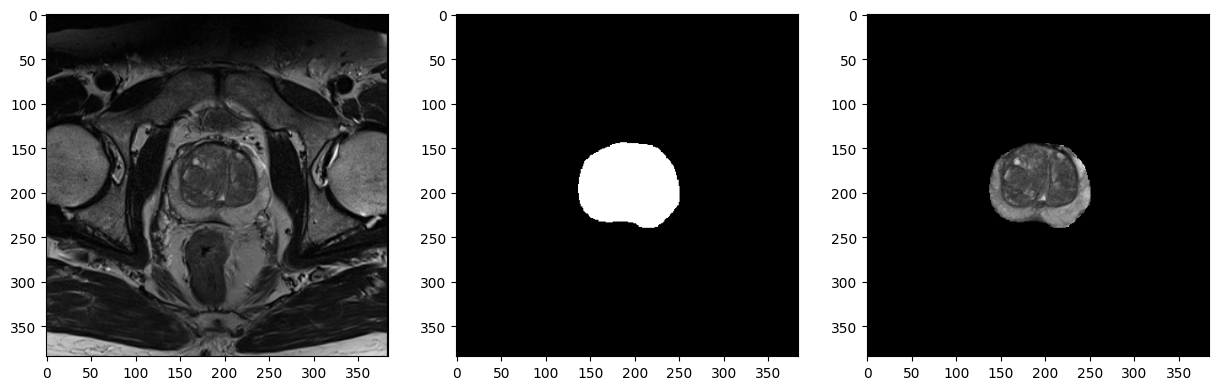

In [28]:
num_sujeto = 100 #1-116
x = nib.load(os.path.join(fp2,"sujeto_"+str(num_sujeto).zfill(3)+".nii"))
sujeto = x.get_fdata()
y = nib.load(os.path.join(fp2,"segmentacion_"+str(num_sujeto).zfill(3)+".nii"))
seg = y.get_fdata()
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(sujeto[:,:,int(np.size(sujeto,2)/2)],cmap="gray")
ax[1].imshow(seg[:,:,int(np.size(sujeto,2)/2)],cmap="gray")
ax[2].imshow(sujeto[:,:,int(np.size(sujeto,2)/2)]*seg[:,:,int(np.size(sujeto,2)/2)],cmap="gray")
plt.show()

In [ ]:
num_sujeto = 67 #1-116
x = nib.load(os.path.join(fp2,"sujeto_"+str(num_sujeto)+".nii"))
sujeto = x.get_fdata()
y = nib.load(os.path.join(fp2,"segmentacion_"+str(num_sujeto)+".nii"))
seg = y.get_fdata()

for i in range(np.size(sujeto,2)):
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(sujeto[:,:,i],cmap="gray")
    ax[1].imshow(seg[:,:,i],cmap="gray")
    #plt.clf()
    #plt.pause(0.05)
    plt.show()

In [80]:
sizeSujeto = []
sizeSeg = []
for file in allfiles:
    x = nib.load(os.path.join(fp2,file))
    y = x.get_fdata()
    if "sujeto" in file:
        sizeSujeto.append((file,np.size(y,2),round(x.header["pixdim"][3],2),round(np.size(y,2)*x.header["pixdim"][3])))
    else:
        sizeSeg.append((file,np.size(y,2),round(x.header["pixdim"][3],2),round(np.size(y,2)*x.header["pixdim"][3])))

In [81]:
for n,item in enumerate(sizeSujeto):
    print(item,sizeSeg[n])
    

('sujeto_001.nii', 47, 2.2, 103) ('segmentacion_001.nii', 47, 2.2, 103)
('sujeto_002.nii', 54, 2.2, 119) ('segmentacion_002.nii', 54, 2.2, 119)
('sujeto_003.nii', 42, 2.2, 92) ('segmentacion_003.nii', 42, 2.2, 92)
('sujeto_004.nii', 46, 2.2, 101) ('segmentacion_004.nii', 46, 2.2, 101)
('sujeto_005.nii', 42, 2.2, 92) ('segmentacion_005.nii', 42, 2.2, 92)
('sujeto_006.nii', 39, 2.8, 109) ('segmentacion_006.nii', 39, 2.8, 109)
('sujeto_007.nii', 34, 3.0, 102) ('segmentacion_007.nii', 34, 3.0, 102)
('sujeto_008.nii', 40, 2.8, 112) ('segmentacion_008.nii', 40, 2.8, 112)
('sujeto_009.nii', 47, 2.2, 103) ('segmentacion_009.nii', 47, 2.2, 103)
('sujeto_010.nii', 39, 2.8, 109) ('segmentacion_010.nii', 39, 2.8, 109)
('sujeto_011.nii', 45, 2.8, 126) ('segmentacion_011.nii', 45, 2.8, 126)
('sujeto_012.nii', 46, 2.2, 101) ('segmentacion_012.nii', 46, 2.2, 101)
('sujeto_013.nii', 32, 3.0, 96) ('segmentacion_013.nii', 32, 3.0, 96)
('sujeto_014.nii', 30, 3.0, 90) ('segmentacion_014.nii', 30, 3.0, 90)


In [4]:
sizeSeg = []
for file in allfiles:
    x = nib.load(os.path.join(fp2,file))
    y = x.get_fdata()
    if "segmentacion" in file:
        cont = 0
        slices = np.size(y,2)
        for slice in range(slices):
            if not np.any(y[:,:,slice]): cont+=1
        sizeSeg.append((file,np.size(y,2),cont,np.size(y,2)-cont))
for item in sizeSeg: print(item)


('segmentacion_001.nii', 47, 22, 25)
('segmentacion_002.nii', 54, 34, 20)
('segmentacion_003.nii', 42, 23, 19)
('segmentacion_004.nii', 46, 22, 24)
('segmentacion_005.nii', 42, 16, 26)
('segmentacion_006.nii', 39, 10, 29)
('segmentacion_007.nii', 34, 18, 16)
('segmentacion_008.nii', 40, 24, 16)
('segmentacion_009.nii', 47, 21, 26)
('segmentacion_010.nii', 39, 23, 16)
('segmentacion_011.nii', 45, 23, 22)
('segmentacion_012.nii', 46, 24, 22)
('segmentacion_013.nii', 32, 21, 11)
('segmentacion_014.nii', 30, 20, 10)
('segmentacion_015.nii', 32, 17, 15)
('segmentacion_016.nii', 32, 17, 15)
('segmentacion_017.nii', 32, 21, 11)
('segmentacion_018.nii', 36, 16, 20)
('segmentacion_019.nii', 32, 23, 9)
('segmentacion_020.nii', 32, 19, 13)
('segmentacion_021.nii', 32, 21, 11)
('segmentacion_022.nii', 32, 22, 10)
('segmentacion_023.nii', 38, 25, 13)
('segmentacion_024.nii', 32, 17, 15)
('segmentacion_025.nii', 32, 21, 11)
('segmentacion_026.nii', 32, 22, 10)
('segmentacion_027.nii', 32, 20, 12)
('

(array([26., 21., 19., 20.,  7.,  5.,  7.,  4.,  3.,  4.]),
 array([ 9. , 11.3, 13.6, 15.9, 18.2, 20.5, 22.8, 25.1, 27.4, 29.7, 32. ]),
 <BarContainer object of 10 artists>)

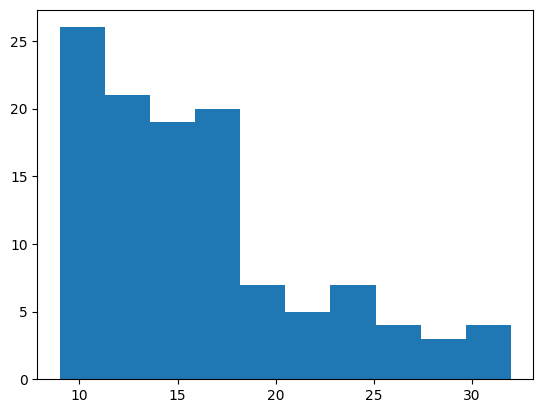

In [74]:
utiles = []
for item in sizeSeg:
    utiles.append(item[:][3])
plt.hist(utiles,bins=10)

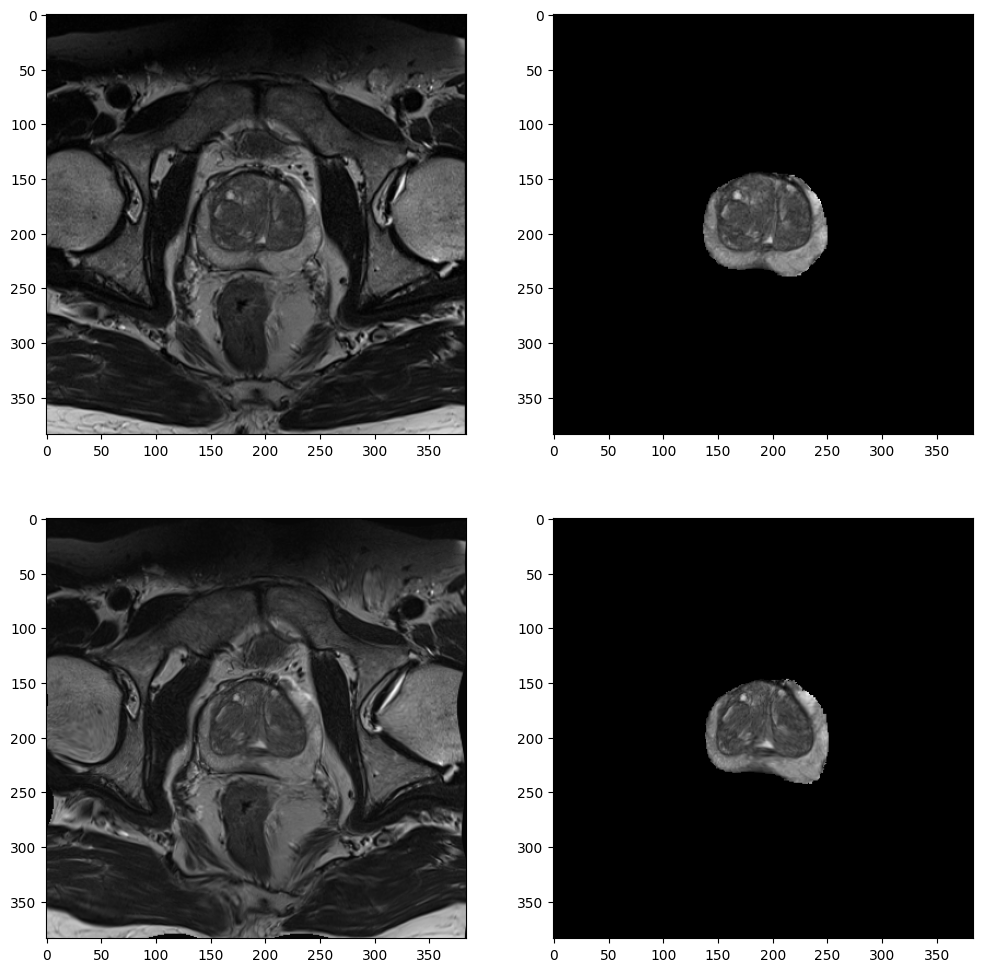

In [59]:
import elasticdeform

img = sujeto[:,:,int(np.size(sujeto,2)/2)]
segg = seg[:,:,int(np.size(sujeto,2)/2)]
img_deformed,seg_deformed = elasticdeform.deform_random_grid([img,segg], sigma=5, points=10)
fig, ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].imshow(img,cmap="gray")
ax[0,1].imshow(img*segg,cmap="gray")
ax[1,0].imshow(img_deformed,cmap="gray")
ax[1,1].imshow(img_deformed*(seg_deformed>=0.5),cmap="gray")
plt.show()
